In [487]:
import sys
import os

repo_root = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
sys.path.append(repo_root)

print(repo_root)

/home/jackyeung99/classes/class_financial-econometrics


In [488]:
import matplotlib.pyplot as plt
import math 
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.structural import UnobservedComponents as UCM

In [489]:
plt.style.use("../styler.mplstyle") 

In [490]:
data = ['CPIAUCSL', 'GDPC1', 'CNP16OV', 'FEDFUNDS', 'LRUN64MAUSM156S', 'LRUN64FEUSM156S']

In [491]:
df = pdr.DataReader(
    data,
    "fred",
    start="1980-01-01",
    end="2025-07-01"
).astype(float).reset_index()

In [492]:
df['INF'] = 400 * np.log(df['CPIAUCSL']/ df['CPIAUCSL'].shift(-1))
df['INF_demeaned'] = df['INF'] - df['INF'].mean()
df = df.rename(columns = {'LRUN64MAUSM156S': 'male_unemployment', 'LRUN64FEUSM156S': 'female_unemployment'})

### Question 1

Text(0, 0.5, '$\\Delta$ INF')

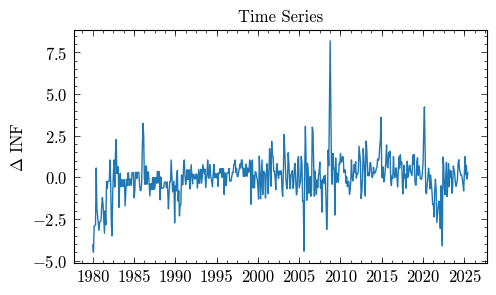

In [493]:
plt.plot(df['DATE'], df['INF_demeaned'])
plt.title("Time Series")
# plt.xlabel("Time")
plt.ylabel("$\Delta$ INF")


In [494]:
p_vals = [0, 1, 2, 3]
q_vals = [0, 1, 2, 3]

In [495]:
models = {}
model_summaries = []

In [496]:
for p in p_vals:  
    for q in q_vals:

        if p == q and p == 0:
            continue
        

        model = ARIMA(df['INF_demeaned'], order=(p, 0, q))
        model_fit = model.fit()

        model_summaries.append({
            'p' : p, 
            'q': q,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic,
            'log_like': model_fit.llf
        })
        models[f'{p}{q}'] = model_fit
        
    

        

/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [497]:
pd.DataFrame(model_summaries)

,p,q,AIC,BIC,log_like
0,0,1,1542.600586,1555.513932,-768.300293
1,0,2,1527.010672,1544.228467,-759.505336
2,0,3,1526.519965,1548.042209,-758.259982
3,1,0,1525.401504,1538.314850,-759.700752
4,1,1,1521.290316,1538.508112,-756.645158
5,1,2,1497.381656,1518.903900,-743.690828
6,1,3,1498.163687,1523.990379,-743.081843
7,2,0,1523.986330,1541.204126,-757.993165
8,2,1,1521.285486,1542.807730,-755.642743
9,2,2,1498.370430,1524.197123,-743.185215


In [498]:
summary_df = pd.DataFrame(model_summaries).sort_values('AIC').reset_index(drop=True)
topN = 2 
top_rows = summary_df.head(topN)
top_rows[['p', 'q', 'AIC']]

,p,q,AIC
0,1,2,1497.381656
1,1,3,1498.163687


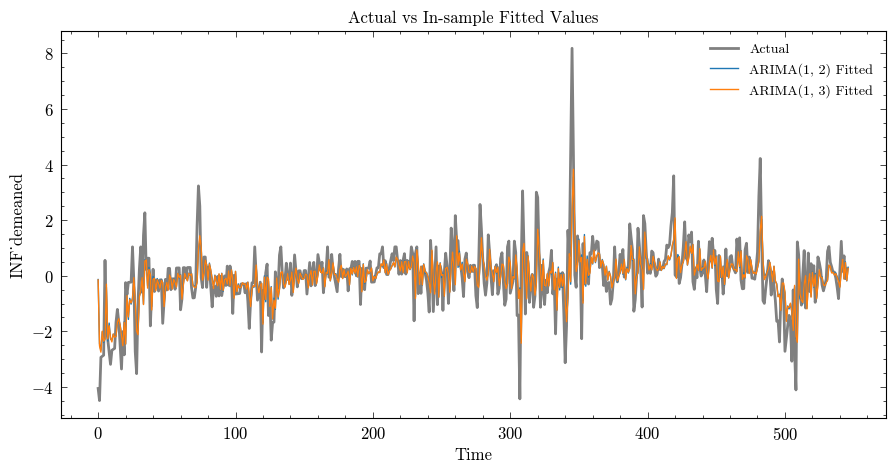

In [499]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['INF_demeaned'], label='Actual', linewidth=2, color='grey')

for i, (_, row) in enumerate(top_rows.iterrows()):
    p = int(row['p'])
    q = int(row['q'])
    
    model_fit = models[f'{p}{q}']  
    ax.plot(
        model_fit.fittedvalues,
        label=f'ARIMA({p}, {q}) Fitted',
        # color=colors[i]
    )

# Format the plot
ax.set_title('Actual vs In-sample Fitted Values')
ax.set_xlabel('Time')
ax.set_ylabel('INF_demeaned')
ax.legend()

plt.savefig('../Figures/Assignment06/aic.png', dpi = 300)
plt.show()

In [500]:
summary_df = pd.DataFrame(model_summaries).sort_values('BIC').reset_index(drop=True)

topN = 2 
top_rows = summary_df.head(topN)
top_rows[['p', 'q', 'BIC']]

,p,q,BIC
0,1,2,1518.903900
1,1,3,1523.990379


In [501]:
summary_df

,p,q,AIC,BIC,log_like
0,1,2,1497.381656,1518.903900,-743.690828
1,1,3,1498.163687,1523.990379,-743.081843
2,2,2,1498.370430,1524.197123,-743.185215
3,3,1,1498.402219,1524.228911,-743.201109
4,3,2,1499.532644,1529.663786,-742.766322
5,2,3,1499.582085,1529.713227,-742.791043
6,3,0,1513.408271,1534.930515,-751.704136
7,3,3,1501.318085,1535.753676,-742.659043
8,1,0,1525.401504,1538.314850,-759.700752
9,1,1,1521.290316,1538.508112,-756.645158


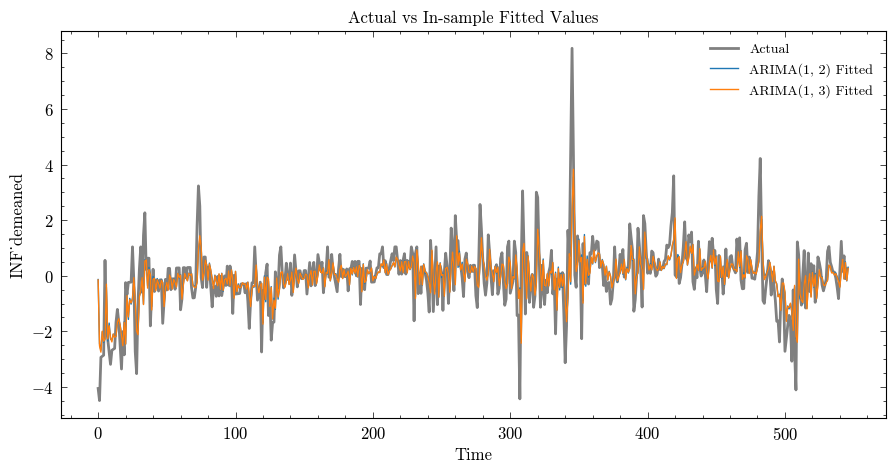

In [502]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['INF_demeaned'], label='Actual', linewidth=2, color='grey')

for i, (_, row) in enumerate(top_rows.iterrows()):
    p = int(row['p'])
    q = int(row['q'])
    
    model_fit = models[f'{p}{q}']  
    ax.plot(
        model_fit.fittedvalues,
        label=f'ARIMA({p}, {q}) Fitted',
        # color=colors[i]
    )

# Format the plot
ax.set_title('Actual vs In-sample Fitted Values')
ax.set_xlabel('Time')
ax.set_ylabel('INF_demeaned')
ax.legend()

plt.savefig('../Figures/Assignment06/bic.png', dpi = 300)
plt.show()

### Question 2

In [503]:
def state_space(time_series):
    model = UCM(time_series, level='local level', irregular=True)
    res = model.fit(disp=False)
    print(res.summary())


    x_filt = res.filtered_state[0]         
    x_smooth = res.smoothed_state[0]        
    u_filt = time_series.values - x_filt
    u_smooth = time_series.values - x_smooth


    return x_filt, x_smooth, u_filt, u_smooth
    

In [504]:
x_filt, x_smooth, u_filt, u_smooth = state_space(df['male_unemployment'])

                        Unobserved Components Results                         
Dep. Variable:      male_unemployment   No. Observations:                  547
Model:                    local level   Log Likelihood                -357.959
Date:                Wed, 05 Nov 2025   AIC                            719.919
Time:                        21:49:03   BIC                            728.524
Sample:                             0   HQIC                           723.283
                                - 547                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  3.435e-12      0.004   9.16e-10      1.000      -0.007       0.007
sigma2.level         0.2173      0.007     31.279      0.000       0.204       0.231
Ljung-Box (L1) (Q):         

/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `irregular` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"


In [505]:
dates = df['DATE']

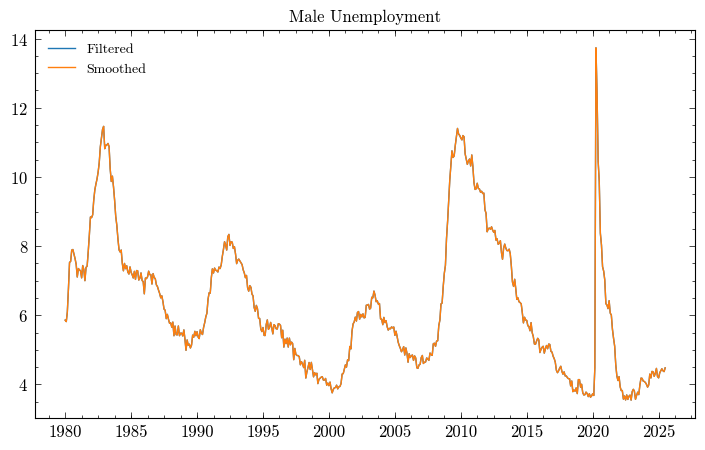

In [506]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Male Unemployment')
plt.plot(dates, x_filt, label = 'Filtered')
plt.plot(dates, x_smooth, label = 'Smoothed')
plt.legend()

plt.savefig('../Figures/Assignment06/male_unemployment.png', dpi = 300)
plt.show()

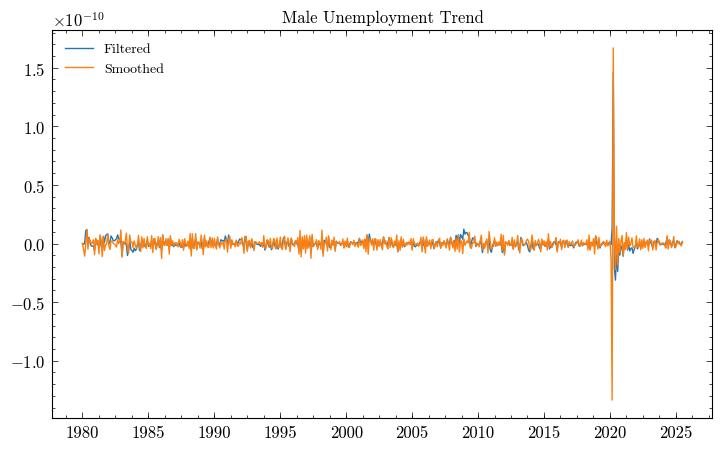

In [507]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Male Unemployment Trend')
plt.plot(dates, u_filt, label = 'Filtered')
plt.plot(dates, u_smooth, label = 'Smoothed')
plt.savefig('../Figures/Assignment06/male_unemployment_cycle.png', dpi = 300)
plt.legend()


In [508]:
female_x_filt, female_x_smooth, female_u_filt, female_u_smooth = state_space(df['female_unemployment'])

                         Unobserved Components Results                         
Dep. Variable:     female_unemployment   No. Observations:                  547
Model:                     local level   Log Likelihood                -520.475
Date:                 Wed, 05 Nov 2025   AIC                           1044.951
Time:                         21:49:03   BIC                           1053.556
Sample:                              0   HQIC                          1048.314
                                 - 547                                         
Covariance Type:                   opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0104      0.005      1.891      0.059      -0.000       0.021
sigma2.level         0.3735      0.010     37.662      0.000       0.354       0.393
Ljung-Box (L1) (Q): 

/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/structural.py:426: SpecificationWarning: Value of `irregular` may be overridden when the trend component is specified using a model string.
  warn("Value of `%s` may be overridden when the trend"


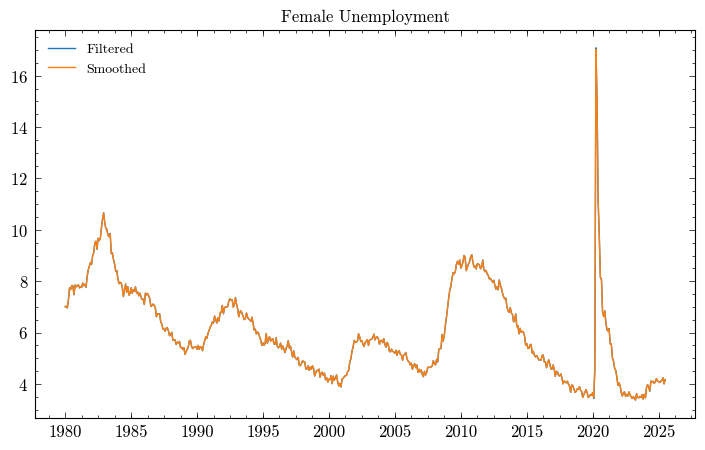

In [509]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Female Unemployment')
plt.plot(dates, female_x_filt, label = 'Filtered')
plt.plot(dates, female_x_smooth, label = 'Smoothed')
plt.legend()

plt.savefig('../Figures/Assignment06/female_unemployment.png', dpi = 300)
plt.show()

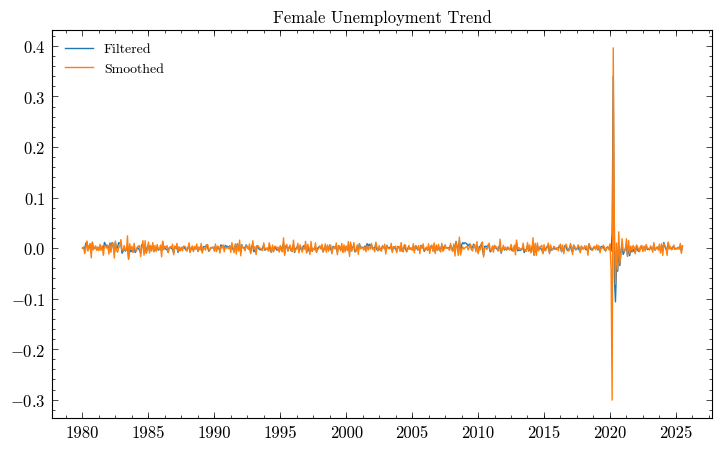

In [510]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Female Unemployment Trend')
plt.plot(dates, female_u_filt, label = 'Filtered')
plt.plot(dates, female_u_smooth, label = 'Smoothed')
plt.legend()

plt.savefig('../Figures/Assignment06/female_unemployment_cycle.png', dpi = 300)
plt.show()

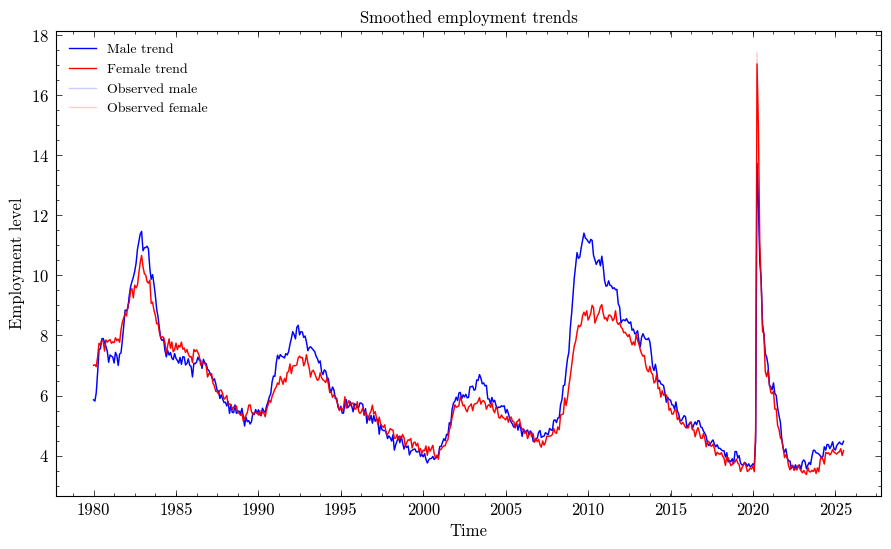

In [511]:
plt.figure(figsize=(10,6))
plt.plot(dates, x_smooth, label='Male trend', color='blue')
plt.plot(dates, female_x_smooth, label='Female trend', color='red')
plt.plot(dates, df['male_unemployment'], color='blue', alpha=0.2, label='Observed male')
plt.plot(dates, df['female_unemployment'], color='red', alpha=0.2, label='Observed female')
plt.legend()
plt.title("Smoothed employment trends")
plt.xlabel("Time")
plt.ylabel("Employment level")

plt.savefig('../Figures/Assignment06/unemployment_cycle.png', dpi = 300)
plt.show()

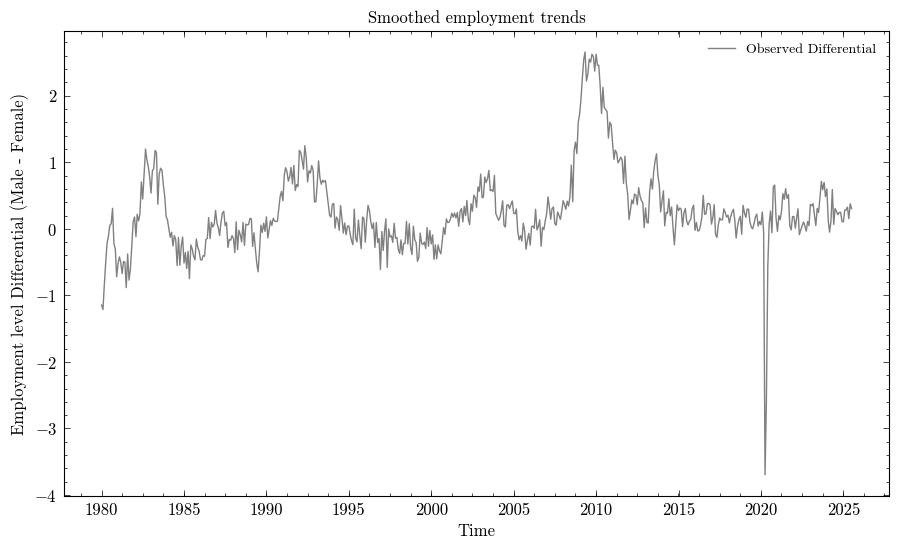

In [512]:
plt.figure(figsize=(10,6))
plt.plot(dates, df['male_unemployment'] - df['female_unemployment'], color='grey', label='Observed Differential')
plt.legend()
plt.title("Smoothed employment trends")
plt.xlabel("Time")
plt.ylabel("Employment level Differential (Male - Female)")

plt.savefig('../Figures/Assignment06/unemployment_diff.png', dpi = 300)
plt.show()

Overall correlation: 0.152


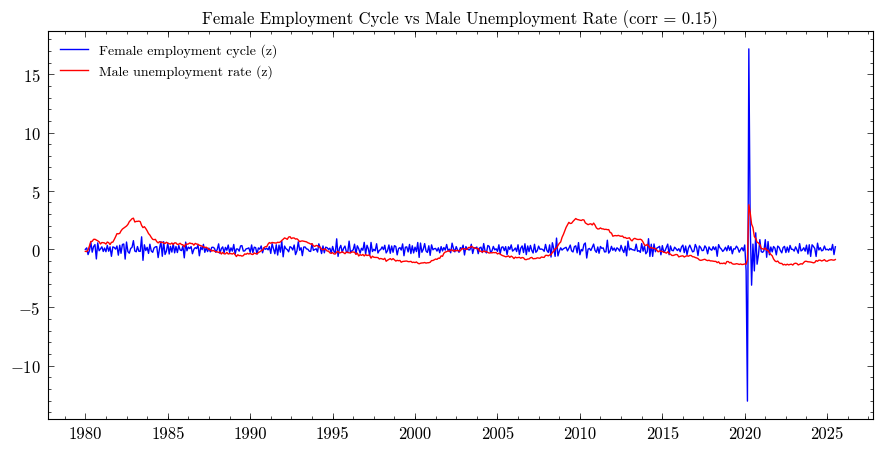

In [513]:


aligned = pd.concat([pd.Series(female_u_smooth), df['male_unemployment']], axis=1).dropna()
aligned.columns = ['Female_cycle', 'Male_unemp']

# Compute correlation
corr = aligned['Female_cycle'].corr(aligned['Male_unemp'])
print(f"Overall correlation: {corr:.3f}")

# Normalize (z-score) for plotting comparably
z_f = (aligned['Female_cycle'] - aligned['Female_cycle'].mean()) / aligned['Female_cycle'].std()
z_m = (aligned['Male_unemp'] - aligned['Male_unemp'].mean()) / aligned['Male_unemp'].std()

plt.figure(figsize=(10,5))
plt.plot(dates, z_f, label='Female employment cycle (z)', color='blue')
plt.plot(dates, z_m, label='Male unemployment rate (z)', color='red')
plt.title(f'Female Employment Cycle vs Male Unemployment Rate (corr = {corr:.2f})')
plt.legend()

plt.savefig('../Figures/Assignment06/unemployment_corr.png', dpi = 300)
plt.show()

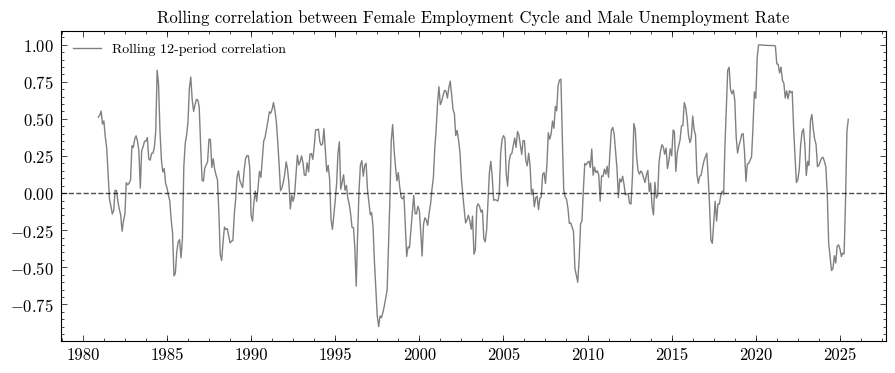

In [514]:
window = 12
aligned['Male_Cycle'] =  u_smooth
rolling_corr = aligned['Female_cycle'].rolling(window).corr(aligned['Male_Cycle'])

plt.figure(figsize=(10,4))
plt.plot(dates, rolling_corr, label=f'Rolling {window}-period correlation', color='grey')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title('Rolling correlation between Female Employment Cycle and Male Unemployment Rate')
plt.legend()

plt.savefig('../Figures/Assignment06/unemployment_rolling_corr.png', dpi = 300)
plt.show()

### Question 3 

In [515]:
df_clean = df[['DATE', 'FEDFUNDS', 'INF']].dropna()
dates = df_clean['DATE']

In [516]:
def estimate_ex_ante(df_subset, date_col='DATE', int_col='FEDFUNDS', inf_col='INF', demean=True):
    """
    Fits r_t = i_t - pi_t, with latent AR(1) ex-ante rate r_t^e.
    Returns a dict of aligned Series and the statsmodels result object.
    """
    df_ = df_subset[[date_col, int_col, inf_col]].copy()
    df_[date_col] = pd.to_datetime(df_[date_col])
    df_ = df_.dropna()

    r = df_[int_col] - df_[inf_col]     # ex-post real rate
    if demean:
        r = r - r.mean()

    model = UCM(r, autoregressive=1, irregular=True)
    res = model.fit(disp=False)

    # states
    r_e_filt   = pd.Series(res.filtered_state[0], index=r.index, name='r_e_filtered')
    r_e_smooth = pd.Series(res.smoothed_state[0], index=r.index, name='r_e_smoothed')

    # measurement errors (optional; not plotted here)
    u_filt   = r - r_e_filt
    u_smooth = r - r_e_smooth

    out = {
        'dates': df_.loc[r.index, date_col],
        'r': r.rename('r_ex_post'),
        'r_e_filt': r_e_filt,
        'r_e_smooth': r_e_smooth,
        'u_filt': u_filt,
        'u_smooth': u_smooth,
        'int': df_.loc[r.index, int_col],
        'inf': df_.loc[r.index, inf_col],
        'beta_hat': float(res.params.get('autoregressive.L1', np.nan)),
        'res': res
    }
    return out

# ---------- Plot 1: ex-ante vs ex-post real rate ----------
def plot_real_rates(est, vertical_marks=None, title_suffix=''):
    """
    est: dict from estimate_ex_ante
    vertical_marks: list of 'YYYY-MM-DD' strings for vertical lines (optional)
    """
    dates = est['dates']
    plt.figure(figsize=(10,5))
    plt.plot(dates, est['r'], label='Ex-post real rate $r_t$', alpha=0.55)
    plt.plot(dates, est['r_e_filt'], label='Filtered ex-ante $r_t^e$', linestyle='--')
    plt.plot(dates, est['r_e_smooth'], label='Smoothed ex-ante $r_t^e$')

    if vertical_marks:
        for d in vertical_marks:
            d_ = pd.to_datetime(d)
            plt.axvline(d_, linewidth=1, alpha=0.6)

    beta = est['beta_hat']
    ttl = "Ex-ante vs Ex-post Real Interest Rates"
    if title_suffix:
        ttl += f" — {title_suffix}"
    plt.title(ttl + (f" (β̂ = {beta:.2f})" if pd.notna(beta) else ""))
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'../Figures/Assignment06/{ttl}.png', dpi = 300)
    plt.show()

# ---------- Plot 2: actual vs expected inflation ----------
def plot_inflation_actual_vs_expected(est, use='smooth', vertical_marks=None, title_suffix=''):
    """
    use: 'smooth' or 'filter' to choose which r_t^e to convert into expected inflation.
    Expected inflation: pi_t^e = i_t - r_t^e
    """
    dates = est['dates']
    r_e = est['r_e_smooth'] if use == 'smooth' else est['r_e_filt']
    pi_exp = (est['int'] - r_e).rename('pi_exp')

    plt.figure(figsize=(10,5))
    plt.plot(dates, est['inf'], label='Actual inflation $\\pi_t$', alpha=0.7)
    plt.plot(dates, pi_exp, label=f'Expected inflation $\\pi_t^e$ ({use})')

    if vertical_marks:
        for d in vertical_marks:
            d_ = pd.to_datetime(d)
            plt.axvline(d_, linewidth=1, alpha=0.6)

    ttl = "Actual vs Expected Inflation"
    if title_suffix:
        ttl += f" — {title_suffix}"
    plt.title(ttl)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'../Figures/Assignment06/{ttl}_inf.png', dpi = 300)
    plt.show()

# ---------- Helpers for slicing by assignment windows ----------
def slice_by_dates(df, start, end, date_col='DATE'):
    """Inclusive slice by calendar dates."""
    d = df.copy()
    d[date_col] = pd.to_datetime(d[date_col])
    mask = (d[date_col] >= pd.to_datetime(start)) & (d[date_col] <= pd.to_datetime(end))
    return d.loc[mask]

/tmp/ipykernel_354525/2679433340.py:62: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:63: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}.png', dpi = 300)
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


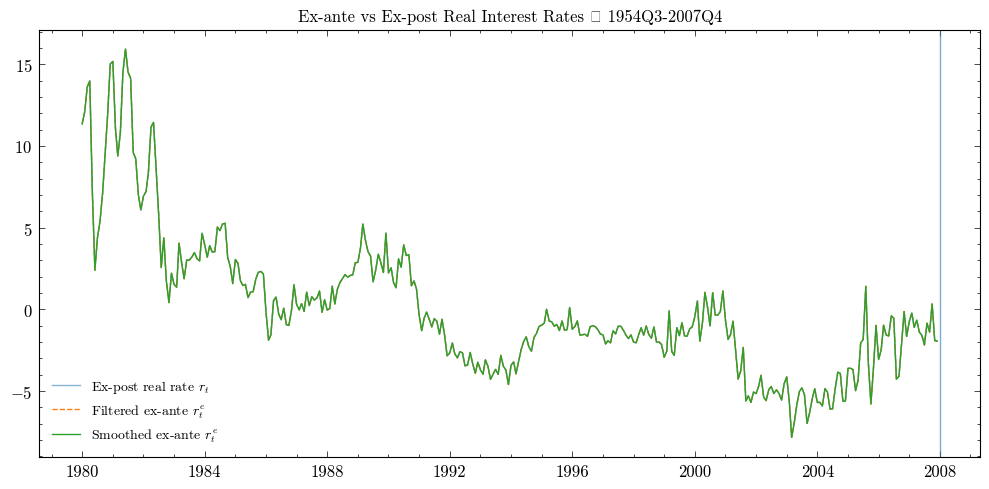

/tmp/ipykernel_354525/2679433340.py:90: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:91: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}_inf.png', dpi = 300)


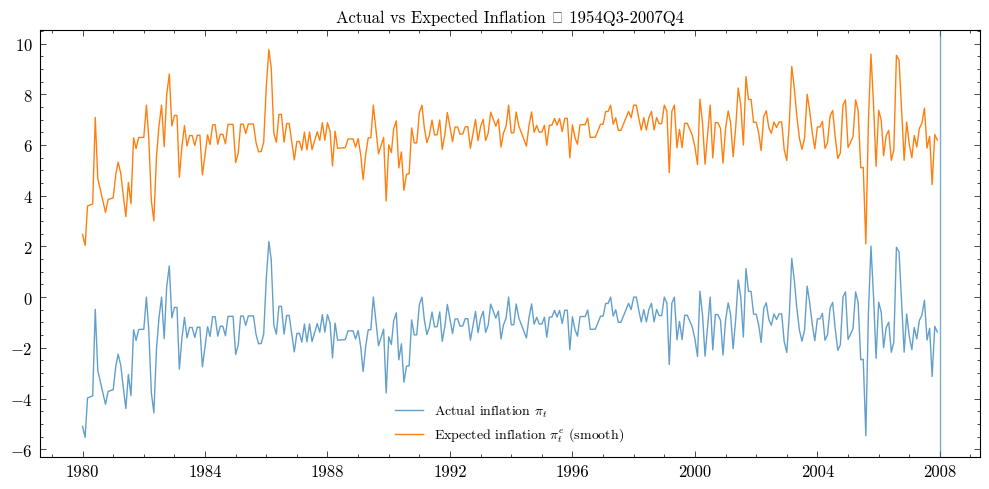

In [517]:
# (a) 1954Q3–2007Q4
df_a = slice_by_dates(df, '1954-07-01', '2007-12-31')
est_a = estimate_ex_ante(df_a)
plot_real_rates(est_a, vertical_marks=['2007-12-31'], title_suffix='1954Q3-2007Q4')
plot_inflation_actual_vs_expected(est_a, use='smooth', vertical_marks=['2007-12-31'], title_suffix='1954Q3-2007Q4')



/tmp/ipykernel_354525/2679433340.py:62: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:62: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:63: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}.png', dpi = 300)
/tmp/ipykernel_354525/2679433340.py:63: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}.png', dpi = 300)
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(

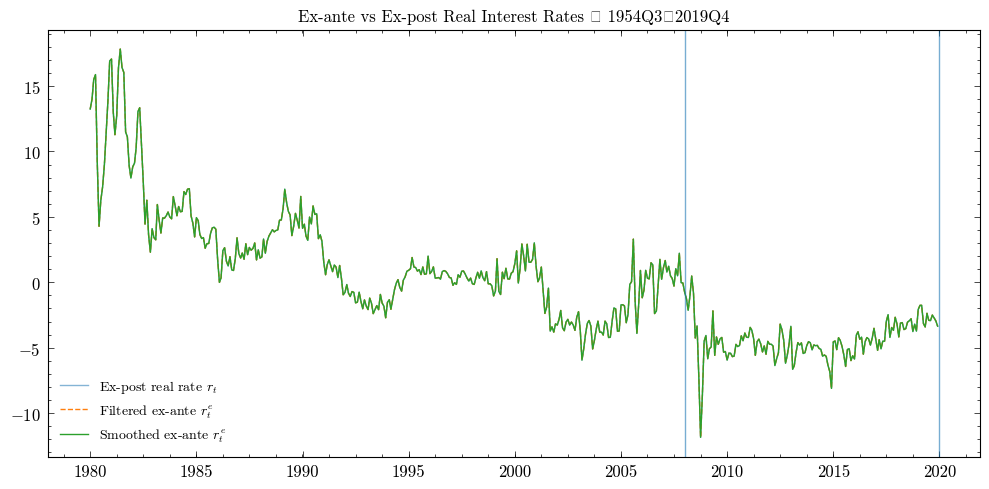

/tmp/ipykernel_354525/2679433340.py:90: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:90: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:91: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}_inf.png', dpi = 300)
/tmp/ipykernel_354525/2679433340.py:91: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}_inf.png', dpi = 300)


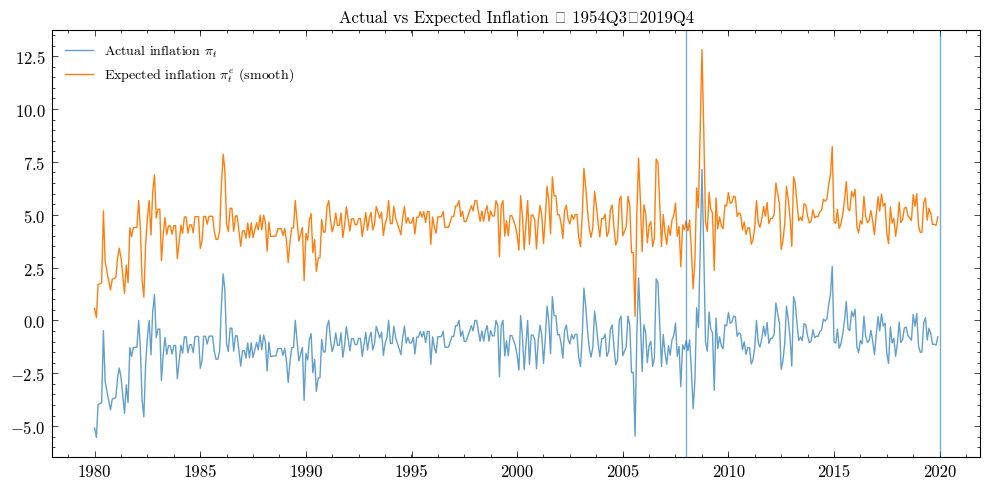

In [518]:
# (c) 1954Q3–2019Q4
df_c = slice_by_dates(df, '1954-07-01', '2019-12-31')
est_c = estimate_ex_ante(df_c)
plot_real_rates(est_c, vertical_marks=['2007-12-31','2019-12-31'], title_suffix='1954Q3–2019Q4')
plot_inflation_actual_vs_expected(est_c, use='smooth', vertical_marks=['2007-12-31','2019-12-31'], title_suffix='1954Q3–2019Q4')


/tmp/ipykernel_354525/2679433340.py:62: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:62: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:63: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}.png', dpi = 300)
/tmp/ipykernel_354525/2679433340.py:63: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}.png', dpi = 300)
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(

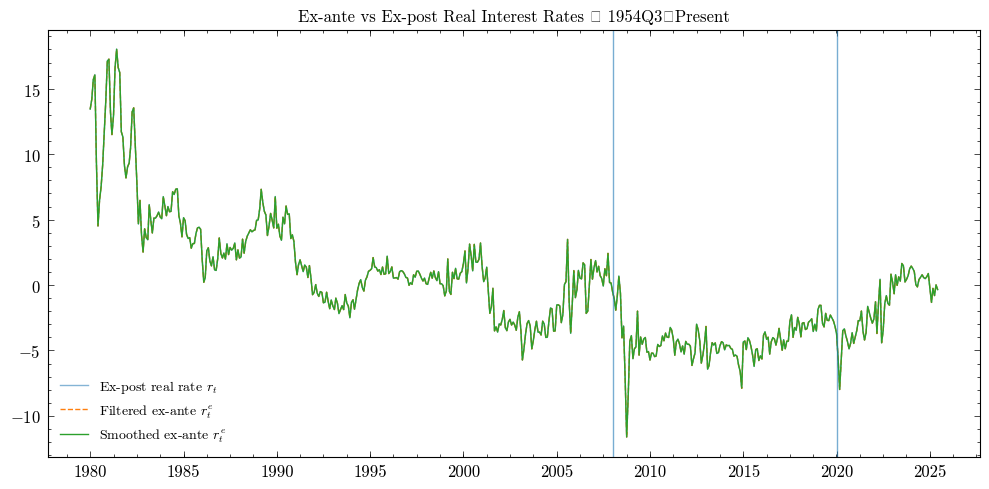

/tmp/ipykernel_354525/2679433340.py:90: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:90: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.tight_layout()
/tmp/ipykernel_354525/2679433340.py:91: UserWarning: Glyph 8212 (\N{EM DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}_inf.png', dpi = 300)
/tmp/ipykernel_354525/2679433340.py:91: UserWarning: Glyph 8211 (\N{EN DASH}) missing from font(s) cmr10.
  plt.savefig(f'../Figures/Assignment06/{ttl}_inf.png', dpi = 300)


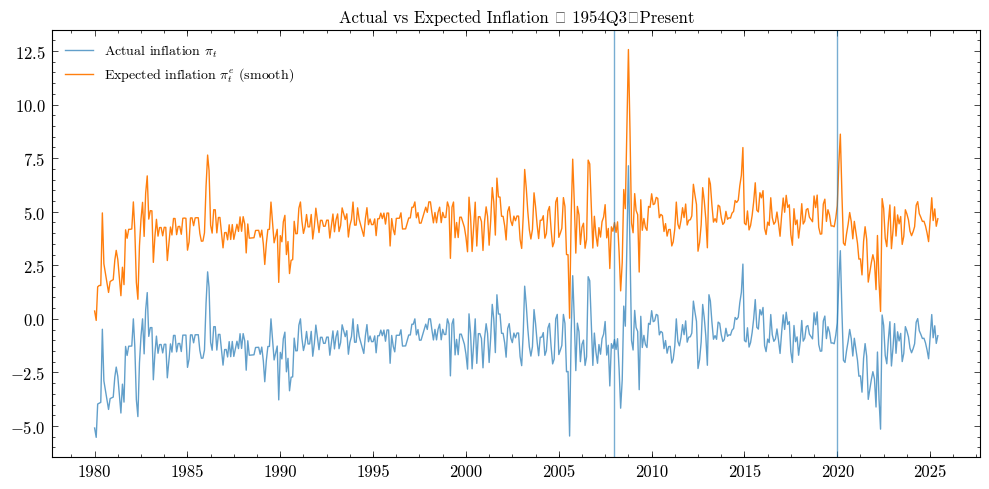

In [519]:

# (d) 1954Q3–present
df_d = slice_by_dates(df, '1954-07-01', '2100-01-01')
est_d = estimate_ex_ante(df_d)
plot_real_rates(est_d, vertical_marks=['2007-12-31','2019-12-31'], title_suffix='1954Q3–Present')
plot_inflation_actual_vs_expected(est_d, use='smooth', vertical_marks=['2007-12-31','2019-12-31'], title_suffix='1954Q3–Present')